<a href="https://colab.research.google.com/github/ranjanchoubey/ml2/blob/main/assignment-1/Q2-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<pre>
Name : Ranjan Kumar Choubey
Class : M.Tech CS 2023-25
Roll No : CS2316
</pre>

![heading](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/heading.png)

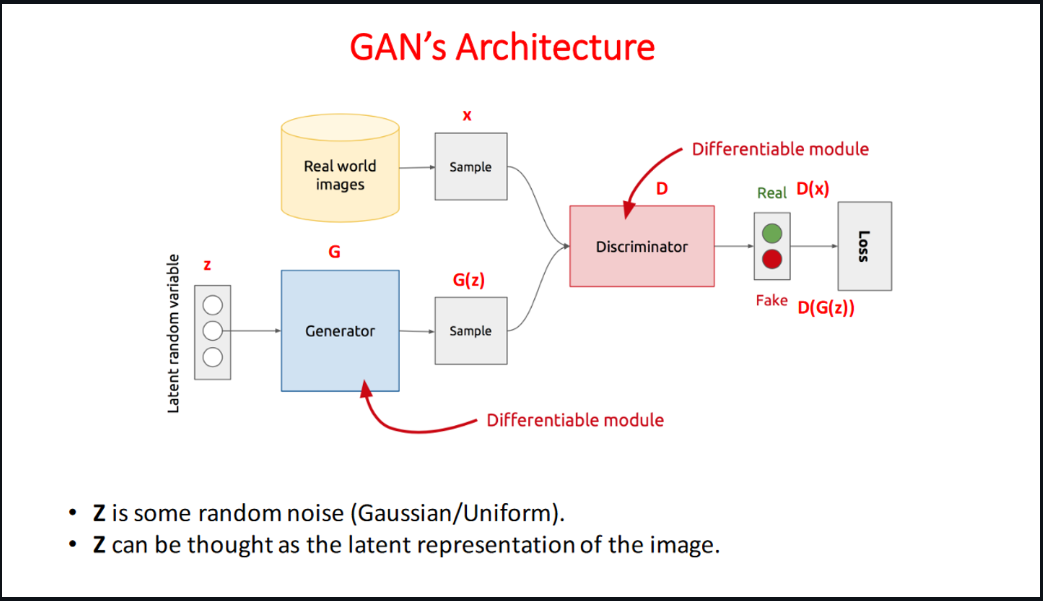

![q2.1.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q2.1.png)

**Solution :**

**Generative Adversial Network**
-  **Generator** $G$ :   Generates fake samples $G(z)$ from noise $z$.
  > **Objective :**  Fool the discriminator by making the generated samples look as real as possible.

    > **Generator's Loss Function** :
$
\mathcal{L}_G = - \mathbb{E}_{z \sim p_z} [\log D(G(z))]
$

<br>

-  **Discriminator** $D$ :  Discriminate between real samples $x$ and  fake samples $G(z)$.
    > **Objective :**  Maximize the likelihood of classifying real samples correctly and minimizing the likelihood of classifying fake samples as real.

  > **Discriminator's loss function** : $
\mathcal{L}_D = - \mathbb{E}_{x \sim p_{data}} [\log D(x)] - \mathbb{E}_{z \sim p_z} [\log (1 - D(G(z)))]
$


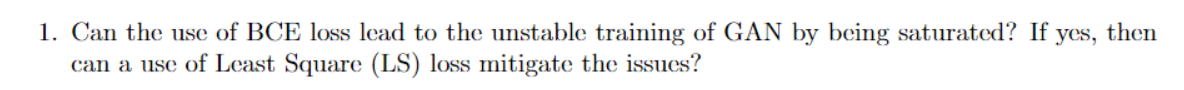

**Ans :** Yes; By Using Binary Cross Entropy (BCE) Loss these problem arises from **saturation**:

1. **Saturated Discriminator**: If the discriminator becomes very strong, it easily classifies real and fake samples, so $D(G(z))$ becomes close to 0. This leads to the gradient for the generator being very small due to the **log** term, which saturates when its argument is close to 0.

2. **Vanishing Gradients**: The generator receives almost no useful gradient information to improve because:

$$
\log(1 - D(G(z))) \approx 0 \text{ if } D(G(z)) \approx 0
$$

This leads to **vanishing gradients**, and the generator's training stagnates.

 ###  **Use of Least Squares (LS) Loss to Mitigate the Issue :**

Least Squares loss modifies the loss functions to minimize the squared error between the predicted and true labels.

- It replaces the log-likelihood loss with a quadratic loss to prevent saturation.
  - For the discriminator : $
  \mathcal{L}_D = \frac{1}{2} \mathbb{E}_{x \sim p_{data}} [(D(x) - 1)^2] + \frac{1}{2} \mathbb{E}_{z \sim p_z} [D(G(z))^2]
  $

  - For the generator : $
  \mathcal{L}_G = \frac{1}{2} \mathbb{E}_{z \sim p_z} [(D(G(z)) - 1)^2]
  $

  <br>

- ### **LS Loss Prevents Saturation :**
  - **Continuous Gradient**: Unlike the BCE loss, where the gradients can vanish when $D(G(z))$ approaches 0, the LS loss ensures that the gradients are smoother and remain non-zero, even when the discriminator is performing well.
  - **Stable Training**: The quadratic nature of the LS loss allows for a more stable gradient flow, preventing the generator from getting stuck.

---


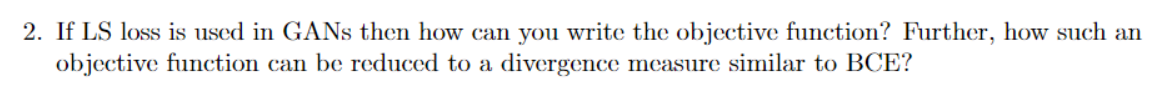

**Ans :**
- ### Objective Function with LS Loss in GANs:

  For the generator $G$ and discriminator $D$, the objective function with LS loss is derived from the goals:

  The overall minimax problem becomes:

  $$
  \min_G \max_D \mathbb{E}_{x \sim p_{data}} \left[ (D(x) - 1)^2 \right] + \mathbb{E}_{z \sim p_z} \left[ D(G(z))^2 \right]
  $$

  This leads to smoother and more stable optimization due to the quadratic nature of the loss.

- ### Relation to Divergence Measure (Similar to BCE Loss):

  Binary Cross Entropy (BCE) loss, used in typical GANs, can be connected to minimizing the **Jensen-Shannon Divergence (JSD)** between the real and generated data distributions.

  - In a standard GAN, minimizing BCE loss approximates minimizing the **Jensen-Shannon Divergence**:

  $$
  \text{JSD}(p_{data} || p_G) = \frac{1}{2} \left( D_{KL}(p_{data} || \frac{p_{data} + p_G}{2}) + D_{KL}(p_G || \frac{p_{data} + p_G}{2}) \right)
  $$

  where $D_{KL}$ is the **Kullback-Leibler divergence**.

<br>

  In contrast, the LS loss doesn’t directly minimize the JSD. Instead, some interpretations suggest that LS loss can be viewed as minimizing a type of **Pearson χ² divergence** between the distributions of real and generated data, which helps avoid the issues of vanishing gradients.

---


## **Derivation :** LSGAN Objective Function and Pearson χ² Divergence

Given:
- The generator: \( G \)
- The discriminator: \( D \)
- Data distributions: \( p_{\text{data}} \) and noise \( p_z \)
- Labels: \( a \), \( b \), and \( c \) representing generated data label, real data label, and the label the generator wants the discriminator to believe, respectively.

### Objective Functions:

1. **Discriminator Objective:**

   $$
   \min_D V_{LSGAN}(D) = \frac{1}{2} \mathbb{E}_{x \sim p_{\text{data}}} \left[(D(x) - b)^2\right] + \frac{1}{2} \mathbb{E}_{z \sim p_z} \left[(D(G(z)) - a)^2\right]
   $$

2. **Generator Objective:**

   $$
   \min_G V_{LSGAN}(G) = \frac{1}{2} \mathbb{E}_{z \sim p_z} \left[(D(G(z)) - c)^2\right]
   $$

---

### **Derivation of $ D^*(x) $**:
Let    $$
f(D) = \frac{1}{2} \mathbb{E}_{x \sim p_{\text{data}}} \left[(D(x) - b)^2\right] + \frac{1}{2} \mathbb{E}_{z \sim p_z} \left[(D(x) - a)^2\right]
$$

This can be rewritten as:

$$
f(D) = \frac{1}{2} \int_x \left[ p_{\text{data}}(x)(D(x) - b)^2 + p_z(x)(D(x) - a)^2 \right] dx
$$

Minimizing \( f(D) \) is equivalent to minimizing:

$$
L(D) = p_{\text{data}}(x)(D(x) - b)^2 + p_z(x)(D(x) - a)^2
$$

Taking the derivative with respect to \( D(x) \) and setting it to 0:

$$
\frac{\partial L(D)}{\partial D(x)} = 2 p_{\text{data}}(x)(D(x) - b) + 2 p_z(x)(D(x) - a) = 0
$$

Solving for $ D^*(x) $:

$$
D^*(x) = \frac{b p_{\text{data}}(x) + a p_z(x)}{p_{\text{data}}(x) + p_z(x)}
$$

---

### **Evaluating the Optimal $ D^*(x) $ in the Generator's Objective:**


Add the term $\frac{1}{2} \mathbb{E}_{x \sim p_{\text{data}}} \left[(D(x) - c)^2\right]$ to $ V_{LSGAN}(G)$

$$
=\frac{1}{2} \mathbb{E}_{x \sim p_{\text{data}}} \left[(D(x) - c)^2\right] + \frac{1}{2} \mathbb{E}_{z \sim p_z} \left[(D(x) - c)^2\right]
$$

Substituting $D^*(x) $

$$
= \frac{1}{2} \int_x \left[(p_{\text{data}}(x) + p_z(x)) \left(\frac{b p_{\text{data}}(x) + a p_z(x)}{p_{\text{data}}(x) + p_z(x)} - c\right)^2 \right] dx
$$

$$
= \frac{1}{2} \int_x \frac{\left[(b - c)(p_{\text{data}}(x) + p_z(x)) - (b - a) p_z(x)\right]^2}{p_{\text{data}}(x) + p_z(x)} dx
$$

---

### Relation to Pearson χ² Divergence:

Taking \( b - c = 1 \) and \( b - a = 2 \), the above expression simplifies to:

$$
\frac{1}{2} \int_x \frac{(p_{\text{data}}(x) + p_z(x) - c)^2}{p_{\text{data}}(x) + p_z(x)} dx
$$

This is equivalent to:

$$
2C = \chi^2_{\text{Pearson}}(p_{\text{data}} + p_z \parallel 2p_z)
$$

where $ \chi^2_{\text{Pearson}} $ is the Pearson χ² divergence.

---


<br>
<hr>
<br>

## **Problem 2.2**



![q2.2.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q2.2.png)

**Solution:**

## Step 1: Import Libraries and Define Auxiliary Functions

- **Random Sampling**: We generate random samples from a normal distribution to create real data points on the quadratic curve.
- **Quadratic Function**: The function \( y = x^2 - 0.3 \) defines the curve we want our GAN to learn.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [5]:

def simple_quad(a):
  return (a**2) - 0.3

def generate_real_samples(num_points):
  first_coordinate = np.random.randn(num_points)
  x_real = np.array([[first_coordinate[i], simple_quad(first_coordinate[i])] for i in range(len(first_coordinate))])
  y_labels = np.ones((num_points, 1)) # Real labels
  return x_real, y_labels

---

## Step 2: Define Latent Space and Generate Fake Samples

- **Latent Space**: A space from which we sample random noise vectors \( z \).
- **Fake Samples**: The generator will transform these noise vectors into fake data points.


In [6]:
def generate_latent_vector_space(latent_dim, num_vectors):
  return np.random.randn(num_vectors, latent_dim)

def generate_fake_samples(generator, latent_dim, num_points):
  x_input = generate_latent_vector_space(latent_dim, num_points)
  x_fake = generator.predict(x_input)
  y_labels = np.zeros((num_points, 1)) # Fake labels
  return x_fake, y_labels


---

## Step 3: Define Generator and Discriminator Models

### Mathematical Explanation
- **Generator Model**: Transforms noise vectors into data points. It aims to minimize the probability of the discriminator correctly identifying fake samples.
- **Discriminator Model**: Classifies data points as real or fake. It aims to maximize the probability of correctly identifying real samples.


In [7]:
LATENT_DIM = 2
NUM_POINTS = 10000
EPOCHS = 10000
g_hidden_dim = [4, 3]
d_hidden_dim = [4, 3, 2]

In [9]:
def generator_model(g_hidden_dim, latent_dim):
  model = Sequential()
  model.add(Dense(g_hidden_dim[0], use_bias=False, activation=LeakyReLU(alpha=0.2), input_dim=latent_dim))
  model.add(BatchNormalization())
  model.add(Dense(g_hidden_dim[1], activation=LeakyReLU(alpha=0.2)))
  model.add(BatchNormalization())
  model.add(Dense(2, activation='linear'))
  assert model.output_shape == (None , 2)
  return model

generator = generator_model(g_hidden_dim, LATENT_DIM)
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59 (236.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 14 (56.00 B)

In [11]:
def discriminator_model(d_hidden_dim):
  model = Sequential()
  model.add(Dense(d_hidden_dim[0], activation='relu', input_dim=2))
  model.add(Dense(d_hidden_dim[1], activation='relu'))
  model.add(Dense(d_hidden_dim[2], activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model

discriminator = discriminator_model(d_hidden_dim)
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38 (152.00 B)

 Trainable params: 38 (152.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 4: Define the GAN Model

- **GAN Model**: Combines the generator and discriminator. The discriminator is set to non-trainable when training the GAN to ensure only the generator is updated.

In [12]:
def GAN(generator_model, discriminator_model):
    discriminator_model.trainable = False

    model = tf.keras.Sequential()

    model.add(generator_model)
    model.add(discriminator_model)

    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

latent_space_dimensions = 5

gan_network = GAN(generator, discriminator)
gan_network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 2)                   │              59 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │              38 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 52 (208.00 B)


---

## Step 5: Training Functions

- **Discriminator Training**: The discriminator is trained on both real and fake samples to maximize its accuracy.
- **GAN Training**: The generator is trained to fool the discriminator, minimizing the loss function.


In [13]:
def train_discriminator(model, num_epochs=1000, batch_size=128):
  half_batch = batch_size // 2

  for i in range(num_epochs):

    # train on real batch

    x_real, y_real = generate_real_samples(num_points=half_batch)
    x_real = np.array(x_real)
    y_real = np.array(y_real)

    model.train_on_batch(x_real, y_real)

    # train on fake batch

    x_fake, y_fake = generate_fake_samples(generator, latent_dim= LATENT_DIM, num_points=half_batch)
    x_fake = np.array(x_fake)
    y_fake = np.array(y_fake)

    model.train_on_batch(x_fake, y_fake)

    _, accuracy_real = model.evaluate(x_real, y_real, verbose = 0)

    _, accuracy_fake = model.evaluate(x_fake, y_fake, verbose = 0)

    print('iteration {}: real_accuracy: {} , fake_accuracy: {}'.format(i + 1, accuracy_real, accuracy_fake))

In [14]:
train_discriminator(discriminator)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 1: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


iteration 2: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


iteration 3: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 4: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
iteration 5: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 6: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 7: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
iteration 8: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 9: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 10: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 11: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 12: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
iteration 13: real_accuracy: 0.0 , fake_accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s


---

## Step 6: Evaluation Function

- **Evaluation**: The generator's performance is evaluated by checking how well it can generate points that the discriminator cannot distinguish from real points.


In [18]:
def evaluate_generator(generator, latent_space_dimensions, discriminator, epoch_number, num_samples=100):
    x_real, y_real = generate_real_samples(num_samples)
    _, accuracy_real_data = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(generator, latent_space_dimensions, num_samples)
    _, accuracy_fake_data = discriminator.evaluate(x_fake, y_fake, verbose=0)

    print('[ EPOCH {} REAL_DATA {} FAKE_DATA {} ]'.format(epoch_number, accuracy_real_data, accuracy_fake_data))

    plt.scatter(x_real[:, 0], x_real[:, 1], color='blue')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='limegreen')
    plt.show()

---

## Step 7: Train the GAN


In [19]:
def train_GAN(generator_model, discriminator_model, gan_model, latent_space_dimensions, num_epochs=10000, batch_size=128, evaluation_buffer=1000):
    half_batch = batch_size // 2

    for i in range(num_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(generator_model, latent_space_dimensions, half_batch)

        discriminator_model.train_on_batch(x_real, y_real)
        discriminator_model.train_on_batch(x_fake, y_fake)

        x_latent_space = generate_latent_vector_space(latent_space_dimensions, batch_size)
        y_labels = np.array([[1] for i in range(batch_size)])

        gan_model.train_on_batch(x_latent_space, y_labels)

        if (i + 1) % evaluation_buffer == 0 or i == 0:
            evaluate_generator(generator_model, latent_space_dimensions, discriminator_model, i)
        if (i + 1) == 10000:
            generator_model.save('./models/generator_model')
            discriminator_model.save('./models/discriminator_model')
            gan_model.save('./models/GAN_model')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[ EPOCH 0 REAL_DATA 0.0 FAKE_DATA 1.0 ]


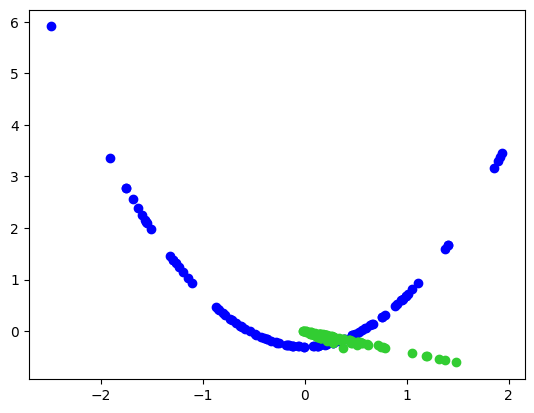

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━

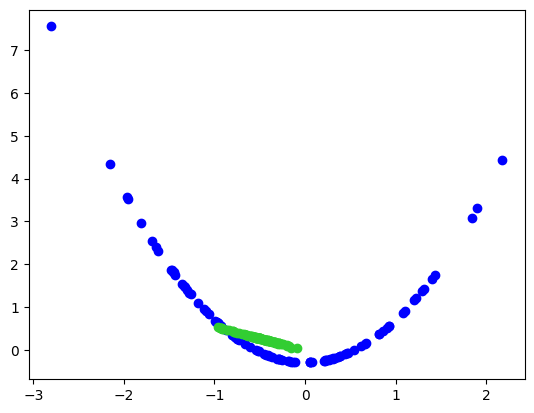

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━

In [ ]:
train_GAN(generator, discriminator, gan_network, LATENT_DIM, 4000)

---

<br>
<hr>
<br>

### **Problem 2.3**

![q2.3.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q2.3.png)
![gan.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/gan.png)
![gan-algo.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/gan-algo.png)
![gan-dataset.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/gan-dataset.png)



###**Solution :**

# DCGAN (Deep Convolutional GAN) Implementation
- Implemented a Deep Convolutional GAN (DCGAN) using PyTorch to generate emoji images. The architecture involves two networks:
- **Generator**: Converts random noise into images.
- **Discriminator**: Distinguishes between real and generated images.



---

## Step 1: Importing Libraries



In [ ]:
import numpy as np
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image


---

## Step 2: Mounting Google Drive

We mount Google Drive to save outputs like trained models and visualizations.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---

## Step 3: Downloading and Extracting the Dataset

We use `gdown` to download the emoji dataset from Google Drive and unzip it.


In [ ]:
!gdown --id 1APkxEWu8Is7pZ-0tCjL8CabSRnyI6IRE
!unzip -q /content/joypixels-7.0-free.zip


---

## Step 4: Setting Hyperparameters

We set the parameters for the DCGAN. These include the size of the latent vector, number of feature maps for the generator and discriminator, batch size, learning rate, and other parameters.

### Explanation:
- `workers`: Number of workers for data loading.
- `batch_size`: Size of the mini-batch.
- `image_size`: Size of the input image.
- `nc`: Number of channels (3 for RGB).
- `nz`: Size of the latent vector.
- `ngf`: Number of generator filters.
- `ndf`: Number of discriminator filters.
- `num_epochs`: Number of training epochs.
- `lr`: Learning rate.
- `beta1`: Parameter for the Adam optimizer.
- `ngpu`: Number of GPUs (set to 1 to use a GPU).



In [ ]:
workers = 8
batch_size = 64
image_size = 32
nc = 3
nz = 100
ngf = 16
ndf = 16
num_epochs = 20
lr = 0.0002
beta1 = 0.5
ngpu = 1


---

## Step 5: Loading the Dataset

We use `ImageFolder` to load the emoji dataset from the extracted folder. We also apply transformations such as resizing, cropping, and normalizing the images.


In [ ]:
dataset = dset.ImageFolder(root='/content/png/unicode',
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)


---

## Step 6: Displaying Some Training Images

We can visualize a few images from the dataset to ensure it's loaded correctly.


In [ ]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()


---

## Step 7: Initializing Weights

We define a function to initialize the weights of our model layers using a normal distribution. This is important to ensure that the model starts with appropriate values for learning.


In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


---

## Step 8: Building the Generator

The generator network is designed to take random noise as input and generate an image. It uses several `ConvTranspose2d` layers, which are transposed convolutions used for upsampling, along with Batch Normalization and LeakyReLU activations.

Let the input noise vector be `z`. The generator maps `z` to the image `x_fake` through a series of transformations:

$$ x_{\text{fake}} = G(z) $$


In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.LeakyReLU(0.8, True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.LeakyReLU(0.8, True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.LeakyReLU(0.8, True),
            nn.ConvTranspose2d(ngf * 2, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Create the generator
netG = Generator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
netG.apply(weights_init)
print(netG)


---

## Step 9: Building the Discriminator

The discriminator is designed to classify whether an input image is real or generated (fake). It uses several `Conv2d` layers, which are standard convolutional layers, with LeakyReLU activations and dropout for regularization.

The discriminator tries to predict whether the input image `x` is real or fake:

$$ D(x) = \sigma(Wx + b) $$

Where $\sigma$ is the sigmoid activation that gives a probability between 0 (fake) and 1 (real).


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf * 2, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Create the discriminator
netD = Discriminator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
netD.apply(weights_init)
print(netD)


---

## Step 10: Defining the Loss Function

We use the Binary Cross Entropy (BCE) loss function for both the generator and the discriminator. The goal is to minimize the BCE loss for the generator (fool the discriminator) and maximize it for the discriminator (correctly classify real and fake images).

For the discriminator:
$$ L_D = -(y \log(D(x)) + (1 - y) \log(1 - D(G(z)))) $$

For the generator:
$$ L_G = -\log(D(G(z))) $$


In [ ]:
criterion = nn.BCELoss()
criterion

---

## Step 11: Setting Up Optimizers

We use the Adam optimizer with a learning rate of `0.0002` and beta1 set to `0.5`.


In [ ]:
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


---

## Step 12: Training the DCGAN

We now set up the training loop. For each epoch:
1. Update the discriminator by maximizing the log-likelihood of correctly classifying real and fake images.
2. Update the generator by minimizing the log-likelihood that the discriminator classifies the fake images as real.


The loss for the generator is:
$$ \mathcal{L}_G = -\log(D(G(z))) $$

The loss for the discriminator is:
$$ \mathcal{L}_D = -(\log(D(x)) + \log(1 - D(G(z)))) $$

We also track the generator and discriminator losses to visualize the learning process.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


!gdown --id 1APkxEWu8Is7pZ-0tCjL8CabSRnyI6IRE
!unzip -q /content/joypixels-7.0-free.zip


In [ ]:
# Set parameters
workers = 8
batch_size = 64
image_size = 32
nc = 3
nz = 100
ngf = 16
ndf = 16
num_epochs = 20
lr = 0.0002
beta1 = 0.5
ngpu = 1

In [ ]:
# Load dataset
dataset = dset.ImageFolder(root='/content/png/unicode',
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)# Load dataset
dataset = dset.ImageFolder(root='/content/png/unicode',
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

In [ ]:
# Set device
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Display some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()


In [ ]:
# Initialize weights
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
# Define the Generator class
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.LeakyReLU(0.8, True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.LeakyReLU(0.8, True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.LeakyReLU(0.8, True),
            nn.ConvTranspose2d(ngf * 2, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the generator
netG = Generator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
netG.apply(weights_init)
print(netG)

In [ ]:
# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf * 2, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the discriminator
netD = Discriminator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
netD.apply(weights_init)
print(netD)

In [ ]:
# Generate dummy noise and pass through the generator
dummy_noise = torch.randn(64, nz, 1, 1, device=device)
da = netG.forward(dummy_noise)
print(netD.forward(da).size())

In [ ]:

# Initialize BCELoss function
criterion = nn.BCELoss()

In [ ]:
# Create batch of latent vectors for visualization
fixed_noise = torch.randn(64, nz, 1, 1, device=device)
# Set real and fake labels
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))


In [ ]:
# Training Loop
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update D network
        netD.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update G network
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check generator's progress
        if (iters % 200 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

In [ ]:
# Plot losses
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Create animation
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
HTML(ani.to_jshtml())

In [ ]:
# Ensure the directory exists
output_dir = '/content/drive/MyDrive/DCGAN_ASSIGN'
os.makedirs(output_dir, exist_ok=True)

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

# Save the animation as a GIF file
gif_path = os.path.join(output_dir, 'training_animation.gif')
ani.save(gif_path, writer='pillow')

# Display the saved GIF
Image(gif_path)

In [ ]:
# Save the generator and discriminator
torch.save(netG.state_dict(), 'generator.pth')
torch.save(netD.state_dict(), 'discriminator.pth')

**END**

---